In [37]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head(50)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [18]:
size = tips['size']
size.loc[:15] = np.nan
size.head(20)

/Users/tengyaolong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

In [65]:
size.shape

(244,)

In [22]:
size.isnull().sum()

16

In [23]:
mean = size.mean()
mean = round(mean)
print(mean)

3


In [24]:
size.fillna(mean, inplace= True)

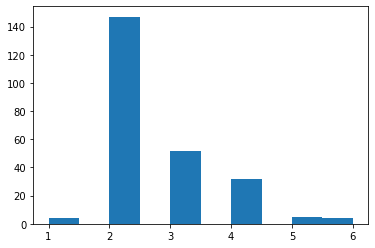

In [36]:
plt.hist(size)
plt.show()

In [26]:
min_val = size.mean() - 3*size.std()
print(min_val)

-0.1974349065787404


In [27]:
max_val = size.mean() + 3*size.std()
print(max_val)

5.369566054119724


In [31]:
outliers = size[size > max_val]
outliers.count()
print(outliers)


125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64


In [33]:
age = size[size <= max_val]
age.shape


(240,)

In [59]:
enc = LabelEncoder()
tips["sex"] = enc.fit_transform(tips['sex'].astype('str'))
tips["smoker"] = enc.fit_transform(tips['smoker'].astype('str'))
tips['day'] = enc.fit_transform(tips['day'].astype('str'))
tips['time'] = enc.fit_transform(tips['time'].astype('str'))

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [57]:
tips_normalized = (tips - tips.min())/ (tips.max()- tips.min())
tips_normalized.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.152283,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6


In [58]:
tips_standardized = (tips - tips.mean())/tips.std()
tips_standardized.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314066,-1.436993,-1.340598,-0.783179,0.278585,-0.620307,-0.598961
1,-1.061054,-0.967217,0.742879,-0.783179,0.278585,-0.620307,0.452453
2,0.137497,0.362610,0.742879,-0.783179,0.278585,-0.620307,0.452453
3,0.437416,0.225291,0.742879,-0.783179,0.278585,-0.620307,-0.598961
4,0.539635,0.442111,-1.340598,-0.783179,0.278585,-0.620307,1.503867
